# Visualización: proyecto

## Conjuntos de datos

In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
from plotnine import *
import re

### `df_pob`

In [3]:
# TODO: Extraer de aqui la distribucion de edades

interest_cols = [
    'ano',
    'municipio',
    'isla',
    'poblacion',
    'poblacion_hombres',
    'poblacion_mujeres',
    'poblacion_edad_media',
    'geometry'
]

df_pob_2019: pd.DataFrame = (gpd.read_file('../data/poblacion/Municipios-20190101.json')
                                .filter(interest_cols))

df_pob_2020: pd.DataFrame = (gpd.read_file('../data/poblacion/Municipios-20200101.json')
                                .filter(interest_cols))

df_pob_2021: pd.DataFrame = (gpd.read_file('../data/poblacion/Municipios-20210101.json')
                                .filter(interest_cols))

df_pob = pd.concat([
    df_pob_2019,
    df_pob_2020,
    df_pob_2021
])

display(df_pob)

,ano,municipio,isla,poblacion,poblacion_hombres,poblacion_mujeres,poblacion_edad_media,geometry
0,2019,35001,ES705,5586,2792,2794,45.356427,"MULTIPOLYGON (((-15.74600 28.05110, -15.74580 ..."
1,2019,35002,ES705,31619,15984,15635,39.903428,"MULTIPOLYGON (((-15.38690 27.90250, -15.38690 ..."
2,2019,35003,ES704,12461,6601,5860,42.225544,"MULTIPOLYGON (((-13.91950 28.25150, -13.91950 ..."
3,2019,35005,ES705,1069,589,480,50.978017,"MULTIPOLYGON (((-15.74960 27.98800, -15.74970 ..."
4,2019,35006,ES705,38138,19000,19138,42.477686,"MULTIPOLYGON (((-15.55940 28.14720, -15.55940 ..."
...,...,...,...,...,...,...,...,...
83,2021,38050,ES706,2917,1519,1398,52.394755,"MULTIPOLYGON (((-17.24500 28.11170, -17.24510 ..."
84,2021,38051,ES709,9161,4568,4593,43.413547,"MULTIPOLYGON (((-16.48760 28.43760, -16.48750 ..."
85,2021,38052,ES709,1789,907,882,46.479877,"MULTIPOLYGON (((-16.66040 28.20140, -16.65990 ..."
86,2021,38053,ES707,4875,2453,2422,45.805231,"MULTIPOLYGON (((-17.84060 28.59660, -17.84010 ..."


### `df_p_activa`

In [4]:
df_p_activa = pd.read_csv('../data/empleo/datasets-ISTAC_eparegActiva-1921.csv')

# Eliminamos las columnas sobrantes
df_p_activa.drop(
    columns = [
        'ESTADO_OBSERVACION#es',
        'CONFIDENCIALIDAD_OBSERVACION#es',
        'NOTAS_OBSERVACION#es'
    ],
    inplace = True
)

# Eliminamos las entradas con SEXO_CODE == _T (Total)
df_p_activa.drop(
    df_p_activa[df_p_activa['SEXO_CODE'] == '_T'].index,
    inplace = True
)

# Eliminamos las entradas de cada isla
rows_islas = df_p_activa[df_p_activa['TERRITORIO_CODE'].str.contains(r'ES\d{3}')].index
df_p_activa.drop(
    rows_islas,
    inplace = True
)

# Añadimos un nuevo campo 'ISLA_CODE'
isla_code_dict = df_pob.set_index('municipio')['isla'].to_dict()
df_p_activa['ISLA_CODE'] = df_p_activa['TERRITORIO_CODE'].map(isla_code_dict)


# Renombramos la columna 'OBS_VALUE' a 'FREQUENCY'
df_p_activa.rename(
    columns = {'OBS_VALUE': 'FREQUENCY'},
    inplace = True
)

display(df_p_activa)

,TIME_PERIOD#es,TIME_PERIOD_CODE,TERRITORIO#es,TERRITORIO_CODE,SEXO#es,SEXO_CODE,EDAD#es,EDAD_CODE,SITUACION_LABORAL_REGISTRADA#es,SITUACION_LABORAL_REGISTRADA_CODE,FREQUENCY,ISLA_CODE
0,2021 Cuarto trimestre,2021-Q4,Artenara,35005,Mujeres,F,De 35 a 44 años,Y35T44,Personas desempleadas registradas,UNE_REG,13,ES705
1,2021 Cuarto trimestre,2021-Q4,Artenara,35005,Mujeres,F,16 años o más,Y_GE16,Personas desempleadas registradas,UNE_REG,47,ES705
2,2021 Cuarto trimestre,2021-Q4,Artenara,35005,Mujeres,F,De 16 a 24 años,Y16T24,Personas desempleadas registradas,UNE_REG,5,ES705
3,2021 Cuarto trimestre,2021-Q4,Artenara,35005,Mujeres,F,55 años o más,Y_GE55,Personas desempleadas registradas,UNE_REG,15,ES705
4,2021 Cuarto trimestre,2021-Q4,Artenara,35005,Mujeres,F,De 25 a 34 años,Y25T34,Personas desempleadas registradas,UNE_REG,5,ES705
...,...,...,...,...,...,...,...,...,...,...,...,...
62197,2019 Primer trimestre,2019-Q1,Agulo,38002,Hombres,M,16 años o más,Y_GE16,Personas activas registradas,ACT_REG,262,ES706
62198,2019 Primer trimestre,2019-Q1,Agulo,38002,Hombres,M,De 16 a 24 años,Y16T24,Personas activas registradas,ACT_REG,13,ES706
62199,2019 Primer trimestre,2019-Q1,Agulo,38002,Hombres,M,55 años o más,Y_GE55,Personas activas registradas,ACT_REG,66,ES706
62200,2019 Primer trimestre,2019-Q1,Agulo,38002,Hombres,M,De 25 a 34 años,Y25T34,Personas activas registradas,ACT_REG,48,ES706


### `df_p_ocup`

In [5]:
df_p_ocup = pd.read_csv('../data/empleo/datasets-ISTAC_eparegOcupadaActividad-1921.csv')

# Eliminamos las columnas sobrantes
df_p_ocup.drop(
    columns = [
        'ESTADO_OBSERVACION#es',
        'CONFIDENCIALIDAD_OBSERVACION#es',
        'NOTAS_OBSERVACION#es'
    ],
    inplace = True
)

# Eliminamos las entradas con SEXO_CODE == _T (Total)
df_p_ocup.drop(df_p_ocup[df_p_ocup['SEXO_CODE'] == '_T'].index, inplace = True)

# Eliminamos las entradas con ACTIVIDAD_ECONOMICA_CODE == _T (Total)
df_p_ocup.drop(df_p_ocup[df_p_ocup['ACTIVIDAD_ECONOMICA_CODE'] == '_T'].index, inplace = True)

# Eliminamos las entradas de cada isla
rows_islas = df_p_ocup[df_p_ocup['TERRITORIO_CODE'].str.contains(r'ES\d{3}')].index
df_p_ocup.drop(
    rows_islas,
    inplace = True
)

# Añadimos un nuevo campo 'ISLA_CODE'
isla_code_dict = df_pob.set_index('municipio')['isla'].to_dict()
df_p_ocup['ISLA_CODE'] = df_p_ocup['TERRITORIO_CODE'].map(isla_code_dict)

# Renombramos la columna 'OBS_VALUE' a 'FREQUENCY'
df_p_ocup.rename(
    columns = {'OBS_VALUE': 'FREQUENCY'},
    inplace = True
)

display(df_p_ocup)

,TIME_PERIOD#es,TIME_PERIOD_CODE,SEXO#es,SEXO_CODE,TERRITORIO#es,TERRITORIO_CODE,ACTIVIDAD_ECONOMICA#es,ACTIVIDAD_ECONOMICA_CODE,FREQUENCY,ISLA_CODE
0,2021 Cuarto trimestre,2021-Q4,Mujeres,F,Artenara,35005,Servicios,A4_04,156,ES705
1,2021 Cuarto trimestre,2021-Q4,Hombres,M,Artenara,35005,Servicios,A4_04,201,ES705
3,2021 Tercer trimestre,2021-Q3,Mujeres,F,Artenara,35005,Servicios,A4_04,152,ES705
4,2021 Tercer trimestre,2021-Q3,Hombres,M,Artenara,35005,Servicios,A4_04,198,ES705
6,2021 Segundo trimestre,2021-Q2,Mujeres,F,Artenara,35005,Servicios,A4_04,146,ES705
...,...,...,...,...,...,...,...,...,...,...
20692,2019 Tercer trimestre,2019-Q3,Hombres,M,Agulo,38002,Construcción,A4_03,28,ES706
20694,2019 Segundo trimestre,2019-Q2,Mujeres,F,Agulo,38002,Construcción,A4_03,3,ES706
20695,2019 Segundo trimestre,2019-Q2,Hombres,M,Agulo,38002,Construcción,A4_03,28,ES706
20697,2019 Primer trimestre,2019-Q1,Mujeres,F,Agulo,38002,Construcción,A4_03,7,ES706


### `df_p_parados`

In [6]:
df_p_parados = pd.read_csv('../data/empleo/datasets-ISTAC_eparegParadosActividad-1921.csv')

# Eliminamos las columnas sobrantes
df_p_parados.drop(
    columns = [
        'ESTADO_OBSERVACION#es',
        'CONFIDENCIALIDAD_OBSERVACION#es',
        'NOTAS_OBSERVACION#es'
    ],
    inplace = True
)

# Eliminamos las entradas con SEXO_CODE == _T (Total)
df_p_parados.drop(df_p_parados[df_p_parados['SEXO_CODE'] == '_T'].index, inplace = True)

# Eliminamos las entradas de cada isla
rows_islas = df_p_parados[df_p_parados['TERRITORIO_CODE'].str.contains(r'ES\d{3}')].index
df_p_parados.drop(
    rows_islas,
    inplace = True
)

# Añadimos un nuevo campo 'ISLA_CODE'
isla_code_dict = df_pob.set_index('municipio')['isla'].to_dict()
df_p_parados['ISLA_CODE'] = df_p_parados['TERRITORIO_CODE'].map(isla_code_dict)

# Renombramos la columna 'OBS_VALUE' a 'FREQUENCY'
df_p_parados.rename(
    columns = {'OBS_VALUE': 'FREQUENCY'},
    inplace = True
)

display(df_p_parados)

,TIME_PERIOD#es,TIME_PERIOD_CODE,SEXO#es,SEXO_CODE,TERRITORIO#es,TERRITORIO_CODE,ACTIVIDAD_ECONOMICA#es,ACTIVIDAD_ECONOMICA_CODE,FREQUENCY,ISLA_CODE
0,2021 Cuarto trimestre,2021-Q4,Hombres,M,Arrecife,35004,Servicios,A4_04,1691,ES708
1,2021 Cuarto trimestre,2021-Q4,Mujeres,F,Arrecife,35004,Servicios,A4_04,2837,ES708
2,2021 Tercer trimestre,2021-Q3,Hombres,M,Arrecife,35004,Servicios,A4_04,1983,ES708
3,2021 Tercer trimestre,2021-Q3,Mujeres,F,Arrecife,35004,Servicios,A4_04,3294,ES708
4,2021 Segundo trimestre,2021-Q2,Hombres,M,Arrecife,35004,Servicios,A4_04,3275,ES708
...,...,...,...,...,...,...,...,...,...,...
12667,2019 Tercer trimestre,2019-Q3,Mujeres,F,El Pinar de El Hierro,38901,Total,_T,79,ES703
12668,2019 Segundo trimestre,2019-Q2,Hombres,M,El Pinar de El Hierro,38901,Total,_T,74,ES703
12669,2019 Segundo trimestre,2019-Q2,Mujeres,F,El Pinar de El Hierro,38901,Total,_T,85,ES703
12670,2019 Primer trimestre,2019-Q1,Hombres,M,El Pinar de El Hierro,38901,Total,_T,76,ES703


### `df_p_tcontrato`

In [7]:
df_p_tcontrato = pd.read_csv('../data/empleo/datasets-ISTAC_eparegParadosActividad-1921.csv')

# Eliminamos las columnas sobrantes
df_p_tcontrato.drop(
    columns = [
        'ESTADO_OBSERVACION#es',
        'CONFIDENCIALIDAD_OBSERVACION#es',
        'NOTAS_OBSERVACION#es'
    ],
    inplace = True
)

# Eliminamos las entradas con SEXO_CODE == _T (Total)
df_p_tcontrato.drop(df_p_tcontrato[df_p_tcontrato['SEXO_CODE'] == '_T'].index, inplace = True)

# Eliminamos las entradas de cada isla
rows_islas = df_p_tcontrato[df_p_tcontrato['TERRITORIO_CODE'].str.contains(r'ES\d{3}')].index
df_p_tcontrato.drop(
    rows_islas,
    inplace = True
)

# Añadimos un nuevo campo 'ISLA_CODE'
isla_code_dict = df_pob.set_index('municipio')['isla'].to_dict()
df_p_tcontrato['ISLA_CODE'] = df_p_tcontrato['TERRITORIO_CODE'].map(isla_code_dict)

# Renombramos la columna 'OBS_VALUE' a 'FREQUENCY'
df_p_tcontrato.rename(
    columns = {'OBS_VALUE': 'FREQUENCY'},
    inplace = True
)

display(df_p_tcontrato)

,TIME_PERIOD#es,TIME_PERIOD_CODE,SEXO#es,SEXO_CODE,TERRITORIO#es,TERRITORIO_CODE,ACTIVIDAD_ECONOMICA#es,ACTIVIDAD_ECONOMICA_CODE,FREQUENCY,ISLA_CODE
0,2021 Cuarto trimestre,2021-Q4,Hombres,M,Arrecife,35004,Servicios,A4_04,1691,ES708
1,2021 Cuarto trimestre,2021-Q4,Mujeres,F,Arrecife,35004,Servicios,A4_04,2837,ES708
2,2021 Tercer trimestre,2021-Q3,Hombres,M,Arrecife,35004,Servicios,A4_04,1983,ES708
3,2021 Tercer trimestre,2021-Q3,Mujeres,F,Arrecife,35004,Servicios,A4_04,3294,ES708
4,2021 Segundo trimestre,2021-Q2,Hombres,M,Arrecife,35004,Servicios,A4_04,3275,ES708
...,...,...,...,...,...,...,...,...,...,...
12667,2019 Tercer trimestre,2019-Q3,Mujeres,F,El Pinar de El Hierro,38901,Total,_T,79,ES703
12668,2019 Segundo trimestre,2019-Q2,Hombres,M,El Pinar de El Hierro,38901,Total,_T,74,ES703
12669,2019 Segundo trimestre,2019-Q2,Mujeres,F,El Pinar de El Hierro,38901,Total,_T,85,ES703
12670,2019 Primer trimestre,2019-Q1,Hombres,M,El Pinar de El Hierro,38901,Total,_T,76,ES703


### `df_defun`

In [8]:
df_defun = pd.read_csv('../data/defunciones/DefCanariaStatTasa.csv').drop(columns = 'Unnamed: 0')

# Rellenar los registros de puntos con 0
df_defun['Defunciones'].replace(
    to_replace = r'^\.+$',
    value = 0,
    regex = True,
    inplace = True
)

# Eliminar los posibles puntos de centena intermedios
df_defun['Defunciones'] = df_defun['Defunciones'].str.replace('.','')

# Sustituye las comas decimales por puntos decimales
df_defun['Defunciones'] = df_defun['Defunciones'].str.replace(',','.')

# Convertir el tipo de dato a numérico
df_defun['Defunciones'] = df_defun['Defunciones'].astype(float)

# Eliminar los espacios sobrantes en los municipios
df_defun['Municipio'] = df_defun['Municipio'].str.strip()

# Rellenar los registros con defunciones NaN
df_defun['Defunciones'].fillna(0, inplace = True)

# Corregir los nombres mal ordenados: 'nombre, (pronombre)'
def fix_municipality_name(mun_name):
    match_result = re.match(
        pattern = r'(.*) \((.*)\)',
        string = mun_name
    )
    if match_result:
        name, pronoun = match_result.groups()
        return f'{pronoun} {name}'
    else:
        return mun_name
    
df_defun['Municipio'] = df_defun['Municipio'].apply(fix_municipality_name)

# Corregir los nombres mal escritos de los municipios
df_defun['Municipio'].replace(
    to_replace = 'La Laguna' ,
    value = 'San Cristóbal de La Laguna',
    inplace = True
)
df_defun['Municipio'].replace(
    to_replace  = df_defun['Municipio'].sort_values().unique(),
    value = df_p_tcontrato['TERRITORIO#es'].sort_values().unique(),
    inplace = True
)

# Añadir los códigos de municipio
cod_mun_dict = df_p_activa.set_index('TERRITORIO#es')['TERRITORIO_CODE'].to_dict()
df_defun['Municipio_codigo'] = df_defun['Municipio'].map(cod_mun_dict)

# Añadir los códigos de isla
isla_code_dict = df_pob.set_index('municipio')['isla'].to_dict()
df_defun['ISLA_CODE'] = df_defun['Municipio_codigo'].map(isla_code_dict)

display(df_defun)

,Municipio,Año,Sexo,Tipo,Defunciones,Municipio_codigo,ISLA_CODE
0,Arrecife,2021,Hombres,I. CIERTAS ENFERMEDADES INFECCIOSAS Y PARASITA...,37.28,35004,ES708
1,Haría,2021,Hombres,I. CIERTAS ENFERMEDADES INFECCIOSAS Y PARASITA...,0.00,35010,ES708
2,San Bartolomé,2021,Hombres,I. CIERTAS ENFERMEDADES INFECCIOSAS Y PARASITA...,21.09,35018,ES708
3,Teguise,2021,Hombres,I. CIERTAS ENFERMEDADES INFECCIOSAS Y PARASITA...,17.14,35024,ES708
4,Tías,2021,Hombres,I. CIERTAS ENFERMEDADES INFECCIOSAS Y PARASITA...,46.80,35028,ES708
...,...,...,...,...,...,...,...
9513,Tacoronte,2019,Mujeres,XX. CAUSAS EXTERNAS DE MORBILIDAD Y DE MORTALIDAD,32.85,38043,ES709
9514,El Tanque,2019,Mujeres,XX. CAUSAS EXTERNAS DE MORBILIDAD Y DE MORTALIDAD,0.00,38044,ES709
9515,Tegueste,2019,Mujeres,XX. CAUSAS EXTERNAS DE MORBILIDAD Y DE MORTALIDAD,0.00,38046,ES709
9516,La Victoria de Acentejo,2019,Mujeres,XX. CAUSAS EXTERNAS DE MORBILIDAD Y DE MORTALIDAD,0.00,38051,ES709


## Historia

### Muertes por tipo según la isla

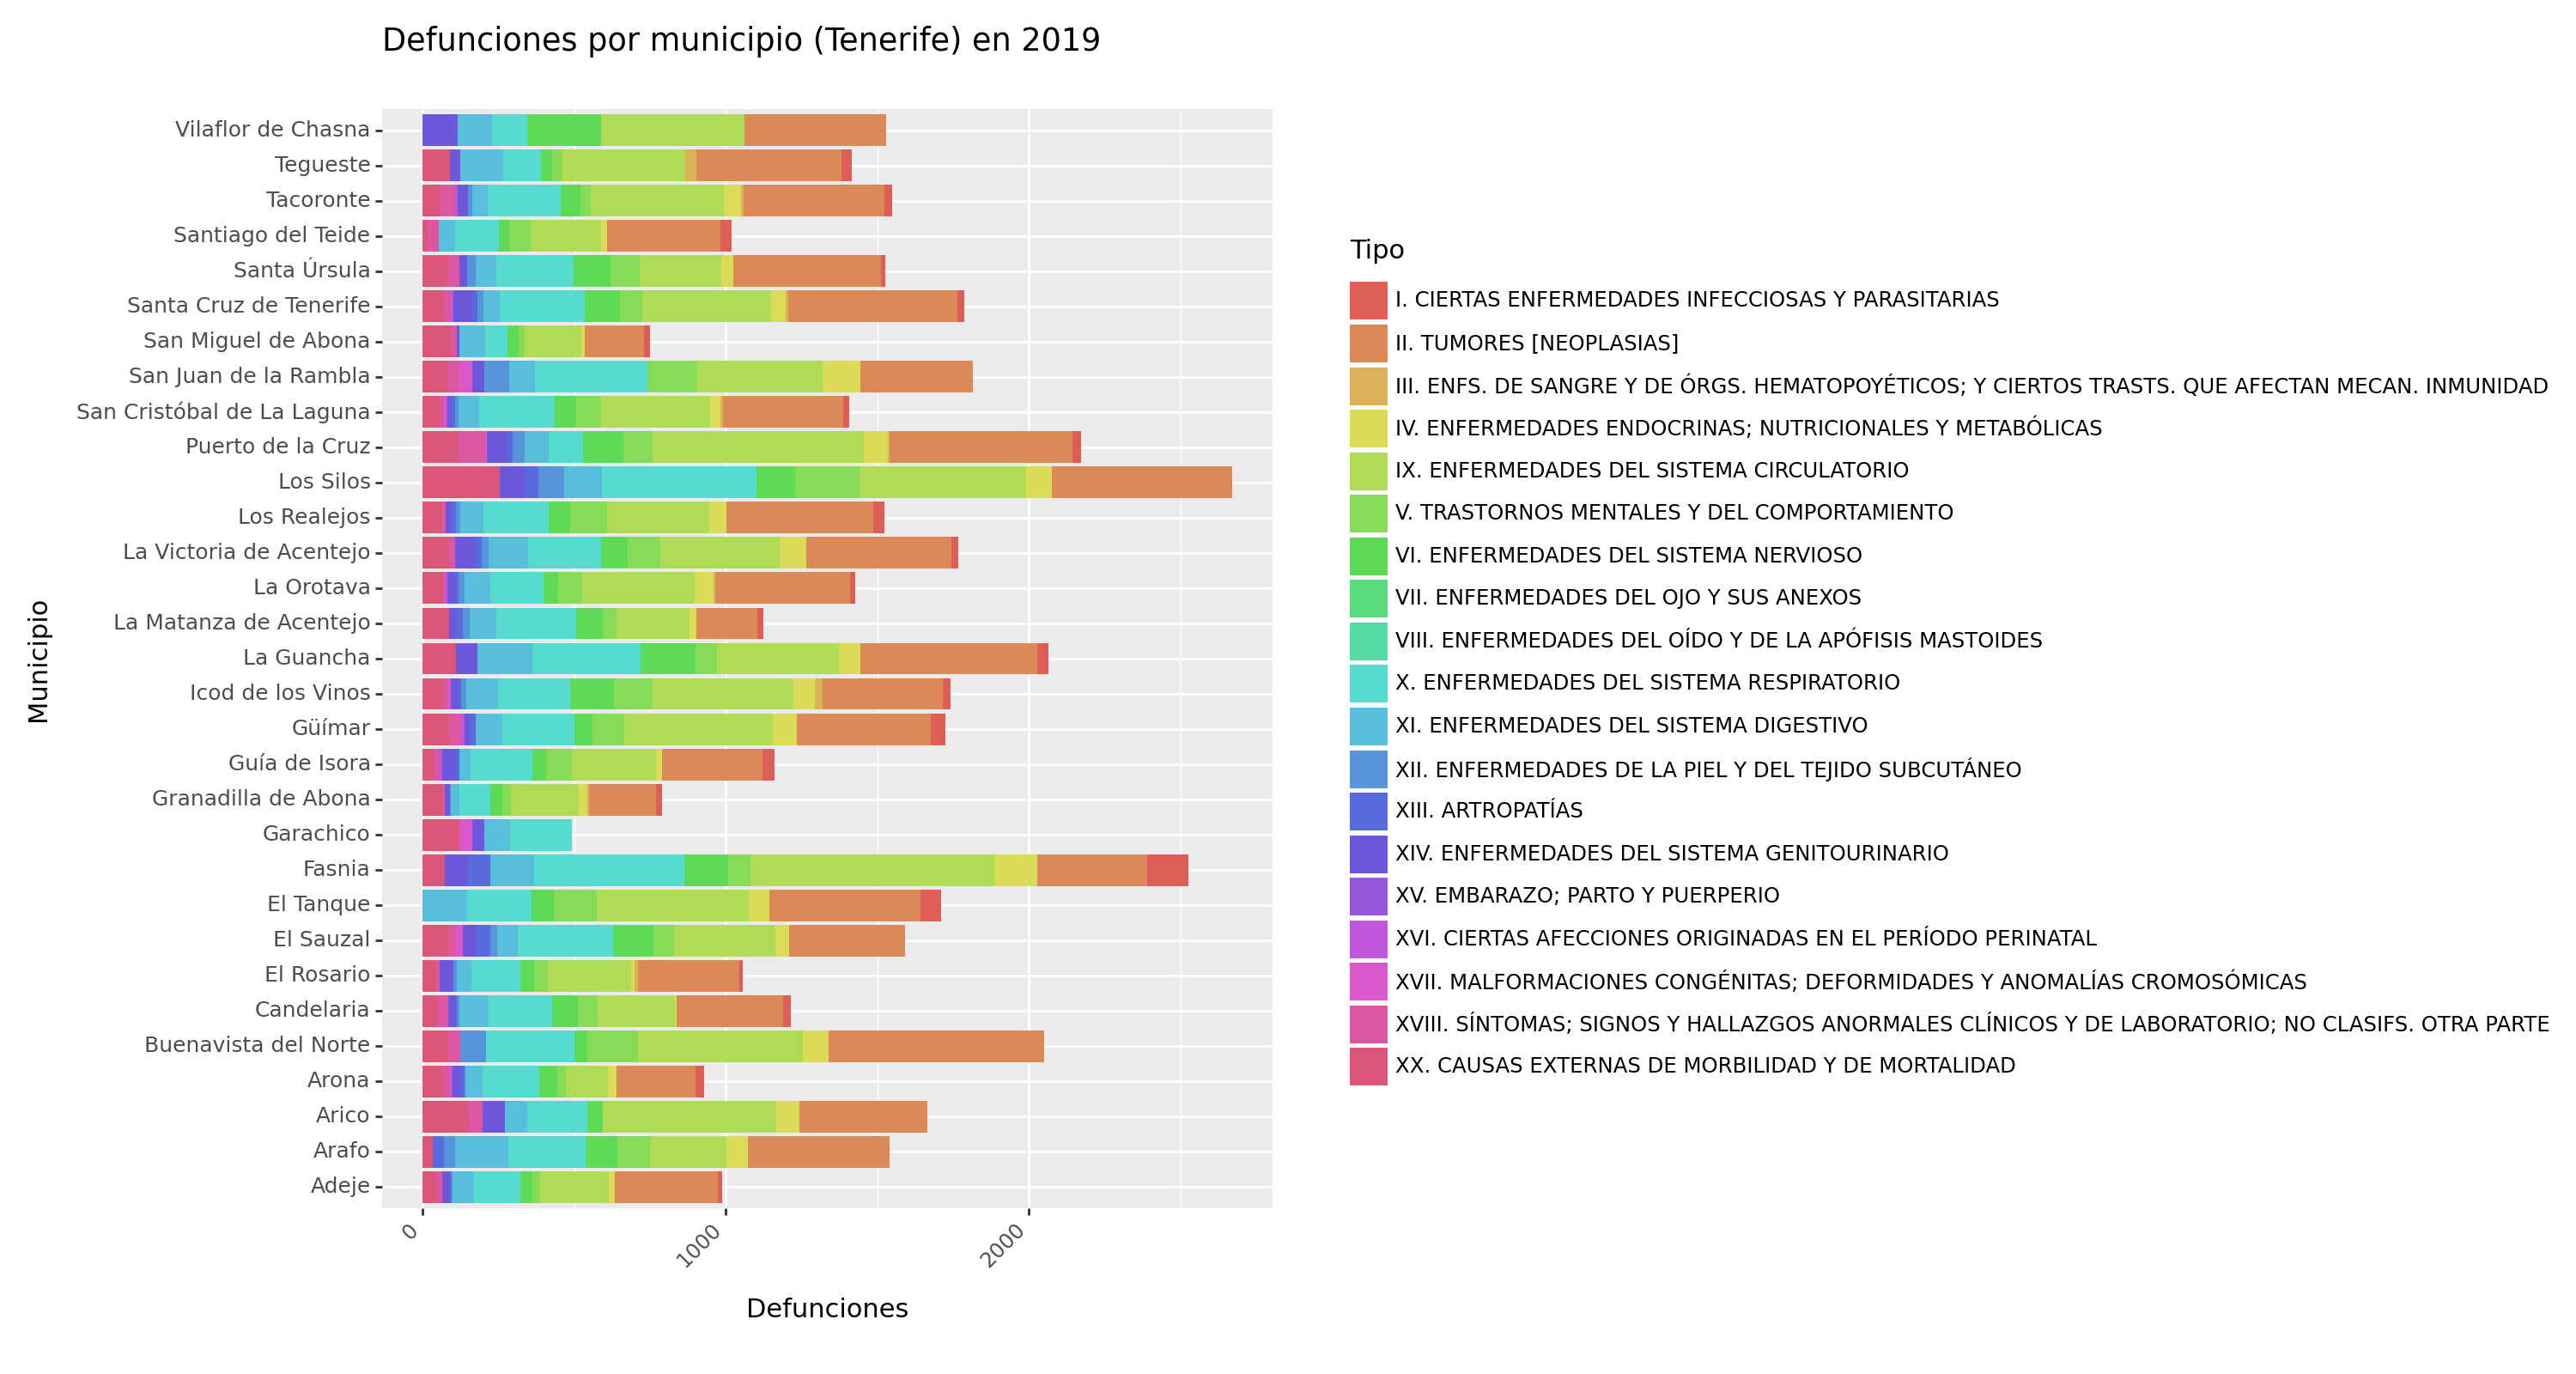

<Figure Size: (1500 x 800)>

In [9]:
df_defun_tenerife = df_defun.query('ISLA_CODE == "ES709" and Año == 2019')

(ggplot(df_defun_tenerife, aes(x = 'Municipio', y = 'Defunciones', fill = "Tipo"))
    + geom_col()
    + coord_flip()
    + theme(
        figure_size=(15, 8),
        axis_text_x = element_text(rotation = 45, hjust = 1),
        axis_text_y = element_text(size = 9)
        )
    + ggtitle('Defunciones por municipio (Tenerife) en 2019')
) 

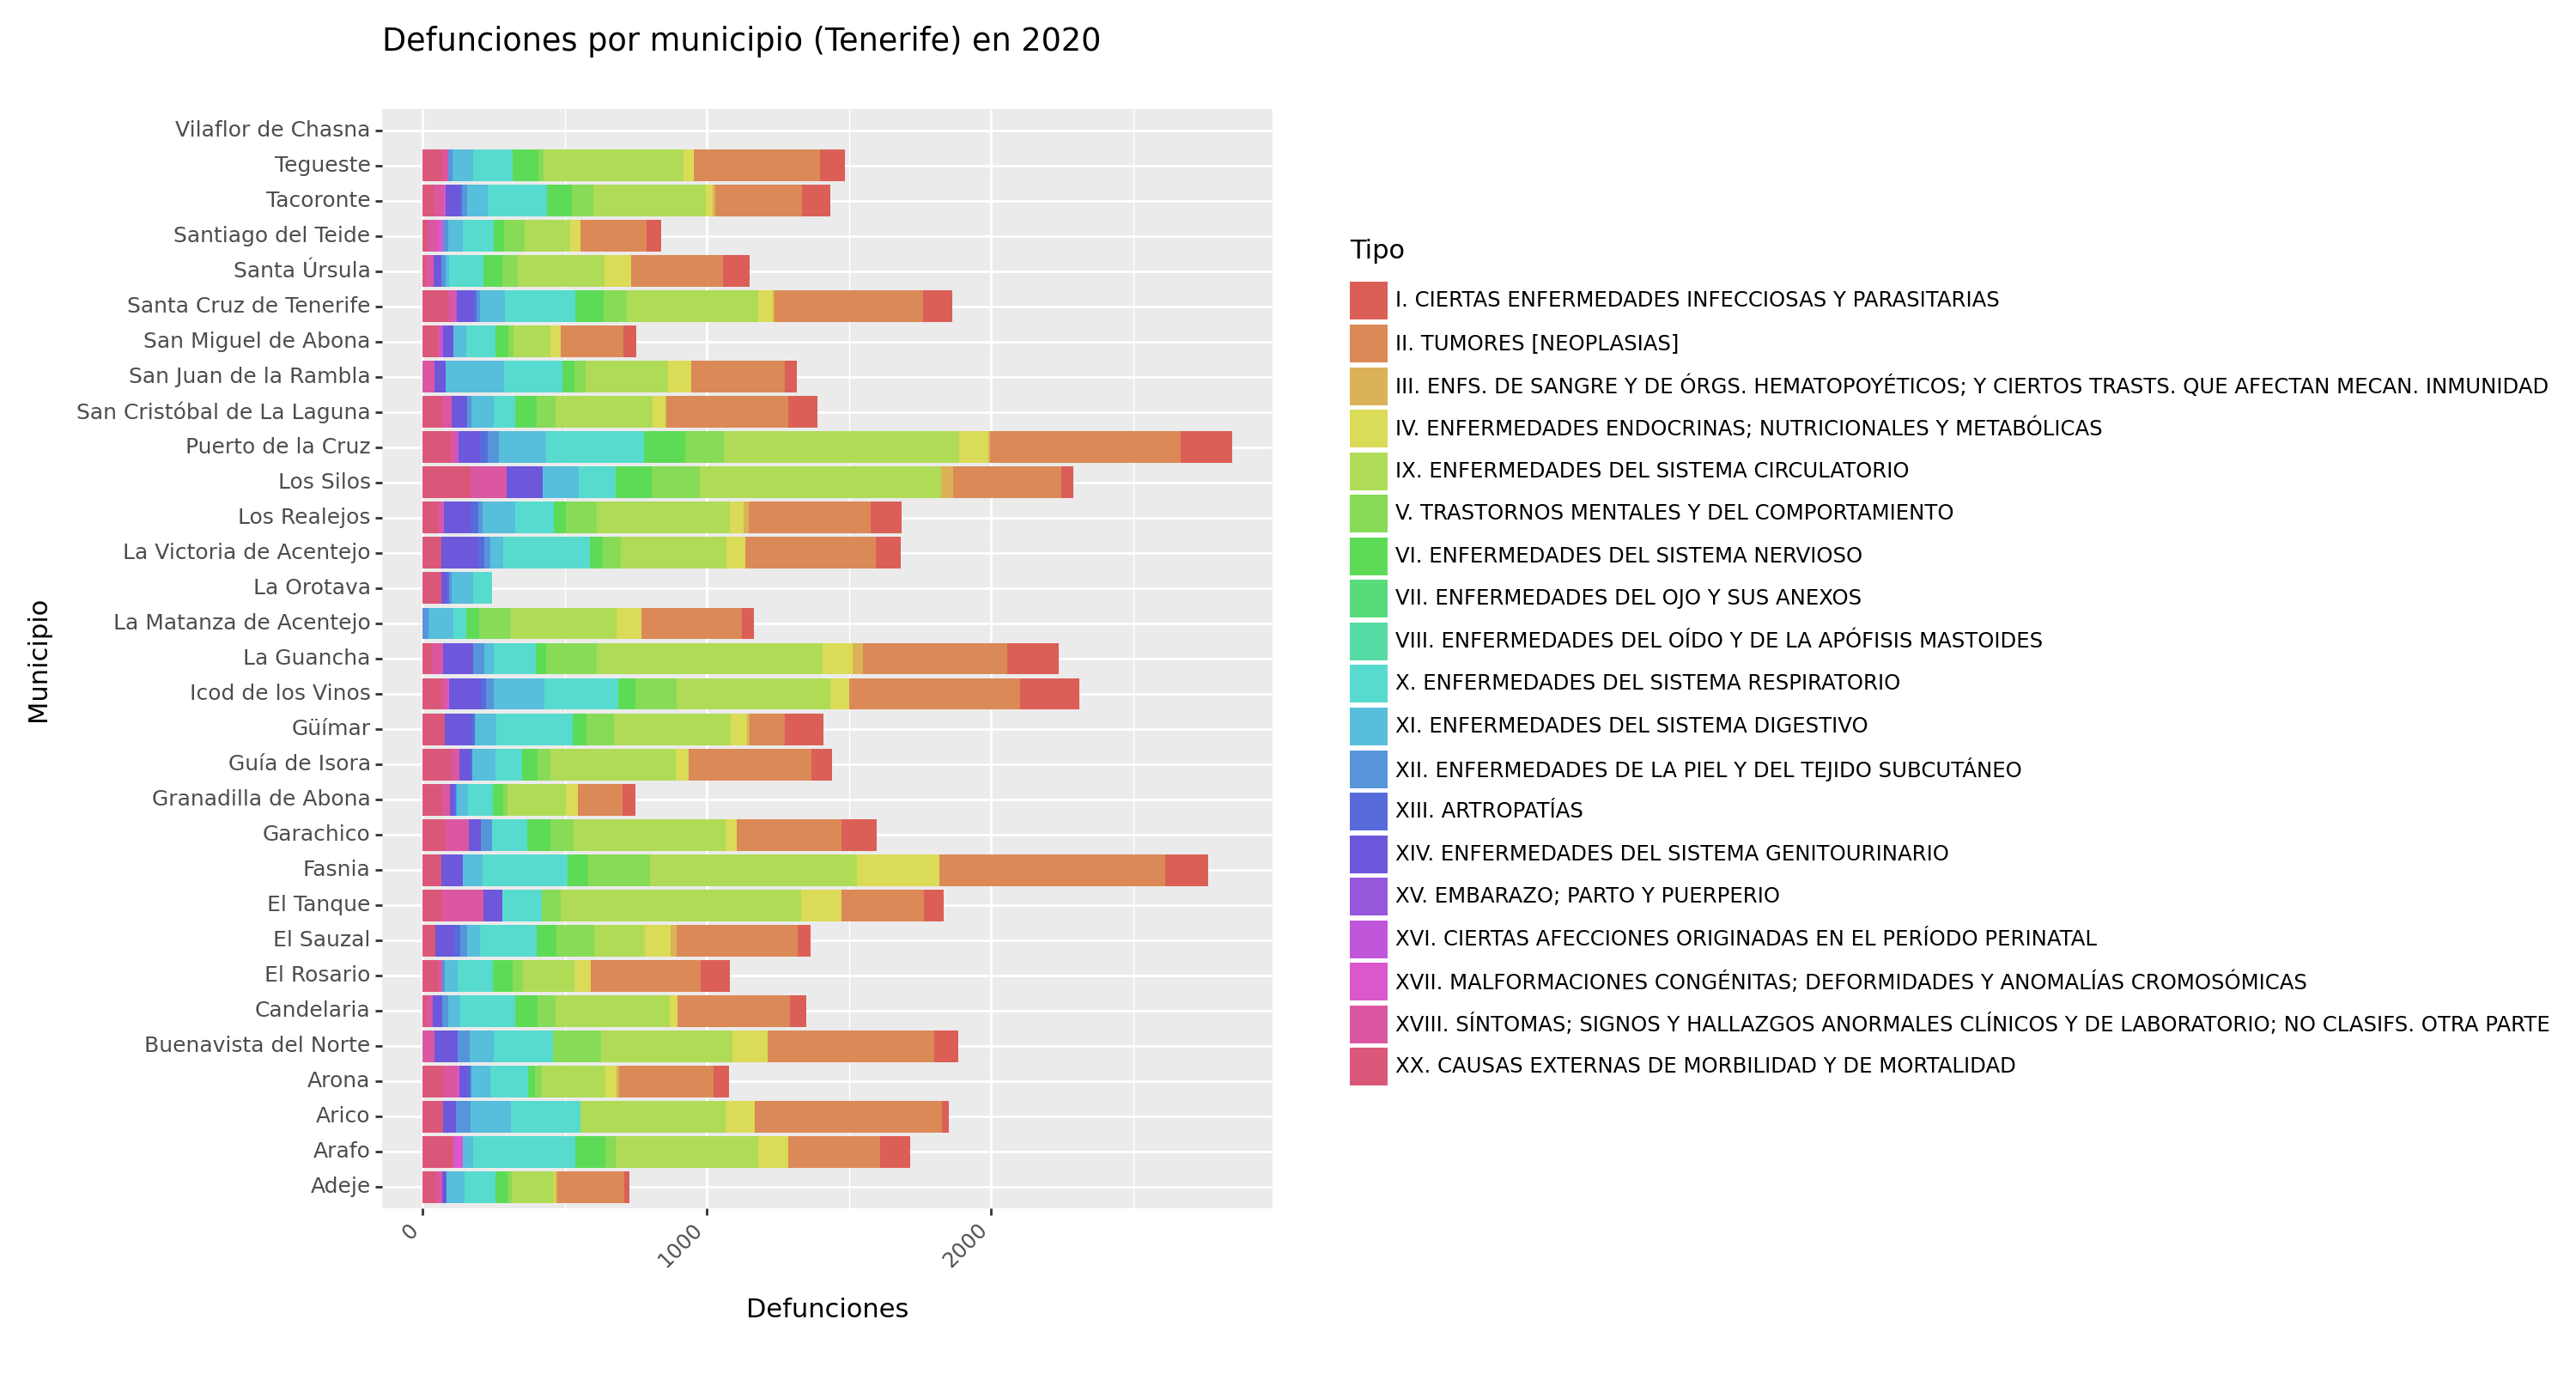

<Figure Size: (1500 x 800)>

In [10]:
df_defun_tenerife = df_defun.query('ISLA_CODE == "ES709" and Año == 2020')

(ggplot(df_defun_tenerife, aes(x = 'Municipio', y = 'Defunciones', fill = "Tipo"))
    + geom_col()
    + coord_flip()
    + theme(
        figure_size=(15, 8),
        axis_text_x = element_text(rotation = 45, hjust = 1),
        axis_text_y = element_text(size = 9)
        )
    + ggtitle('Defunciones por municipio (Tenerife) en 2020')
)

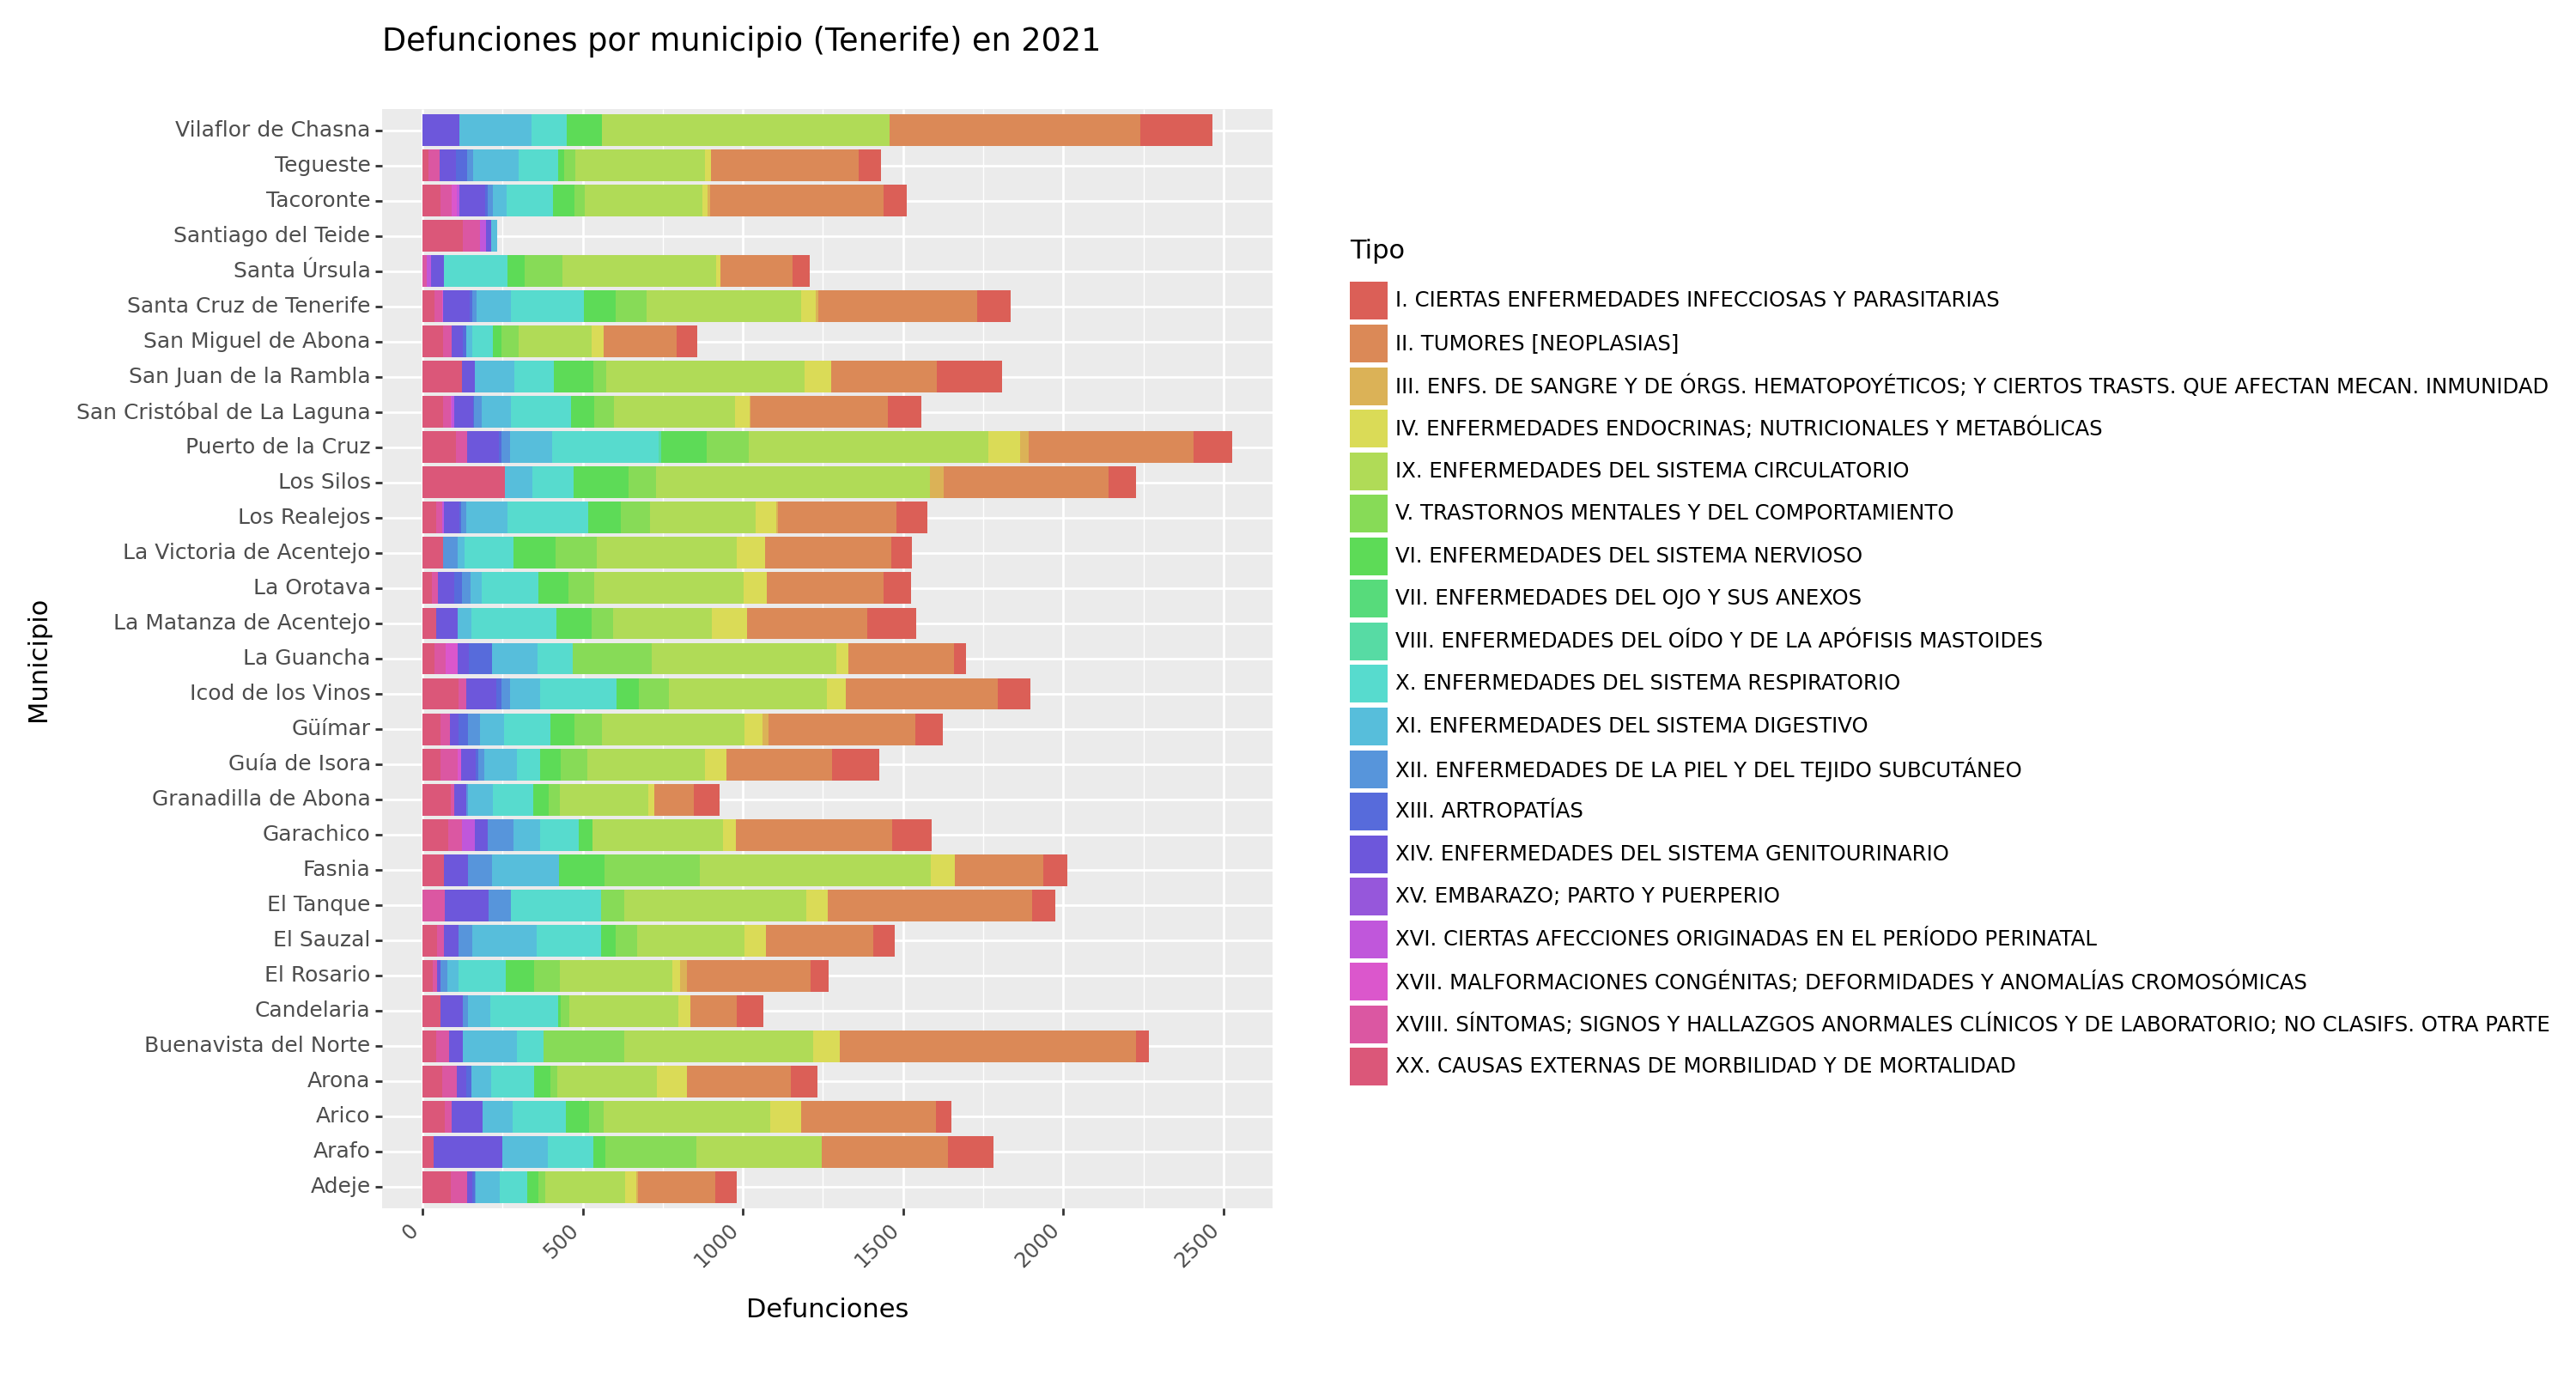

<Figure Size: (1500 x 800)>

In [11]:
df_defun_tenerife = df_defun.query('ISLA_CODE == "ES709" and Año == 2021')

(ggplot(df_defun_tenerife, aes(x = 'Municipio', y = 'Defunciones', fill = "Tipo"))
    + geom_col()
    + coord_flip()
    + theme(
        figure_size=(15, 8),
        axis_text_x = element_text(rotation = 45, hjust = 1),
        axis_text_y = element_text(size = 9)
        )
    + ggtitle('Defunciones por municipio (Tenerife) en 2021')
)

### Mapa de muertes por tumores en Tenerife

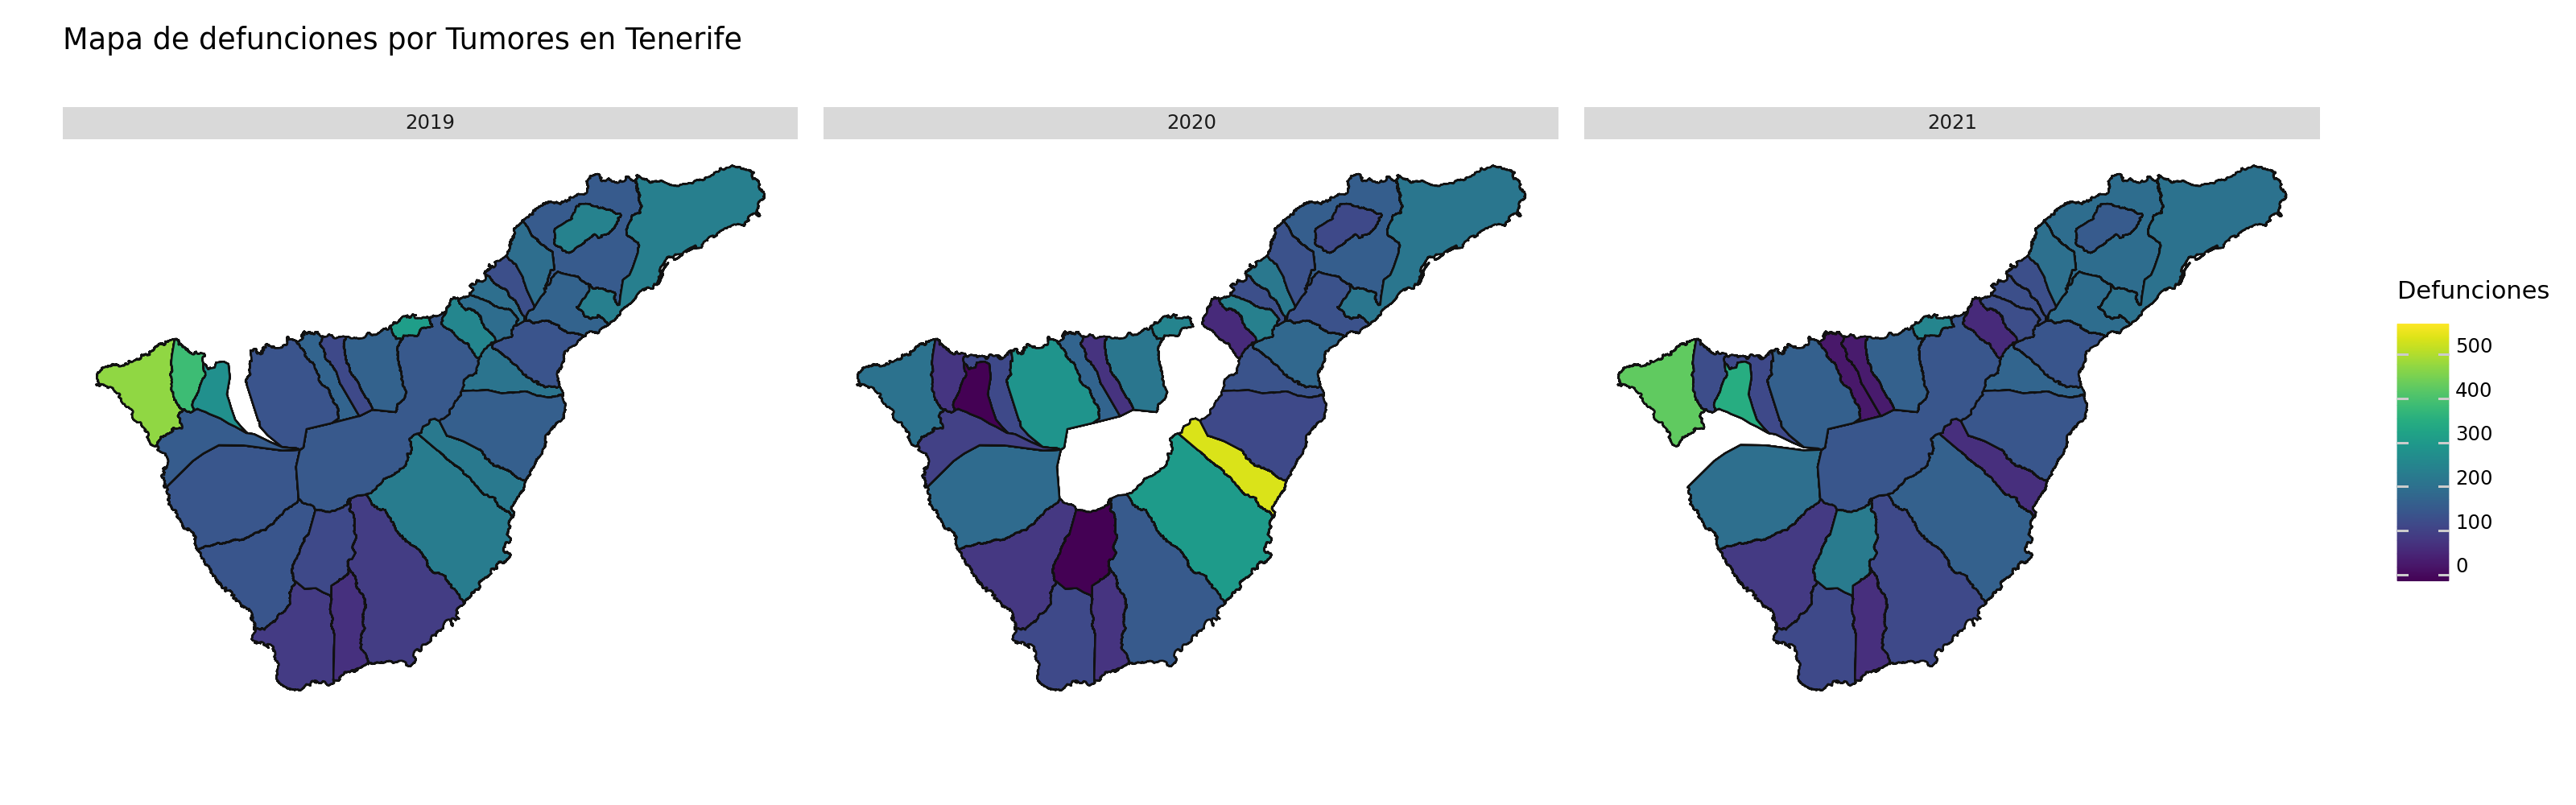

<Figure Size: (1600 x 500)>

In [12]:
df_defun_tnf_tumores = df_defun.query('ISLA_CODE == "ES709" and Tipo == "II. TUMORES [NEOPLASIAS]"')[['Municipio_codigo', 'Año', 'Defunciones']]

df_pob_tnf_tumores = pd.merge(
    left = df_pob,
    right = df_defun_tnf_tumores,
    how = 'inner',
    left_on = 'municipio',
    right_on = 'Municipio_codigo'
).filter(['Año', 'Defunciones', 'geometry'])

(ggplot()
    + geom_map(df_pob_tnf_tumores, aes(fill = 'Defunciones'))
    + facet_wrap("~Año")
    + labs(title = 'Mapa de defunciones por Tumores en Tenerife')
    + theme(
        figure_size = (16, 5),
        panel_background = element_rect(fill = 'white'),
        axis_text_x = element_blank(),
        axis_text_y = element_blank(),
        axis_ticks_major_x = element_blank(),
        axis_ticks_major_y = element_blank()
    )
)

### Mapa de muertes por enfermedades circulatorias en Tenerife

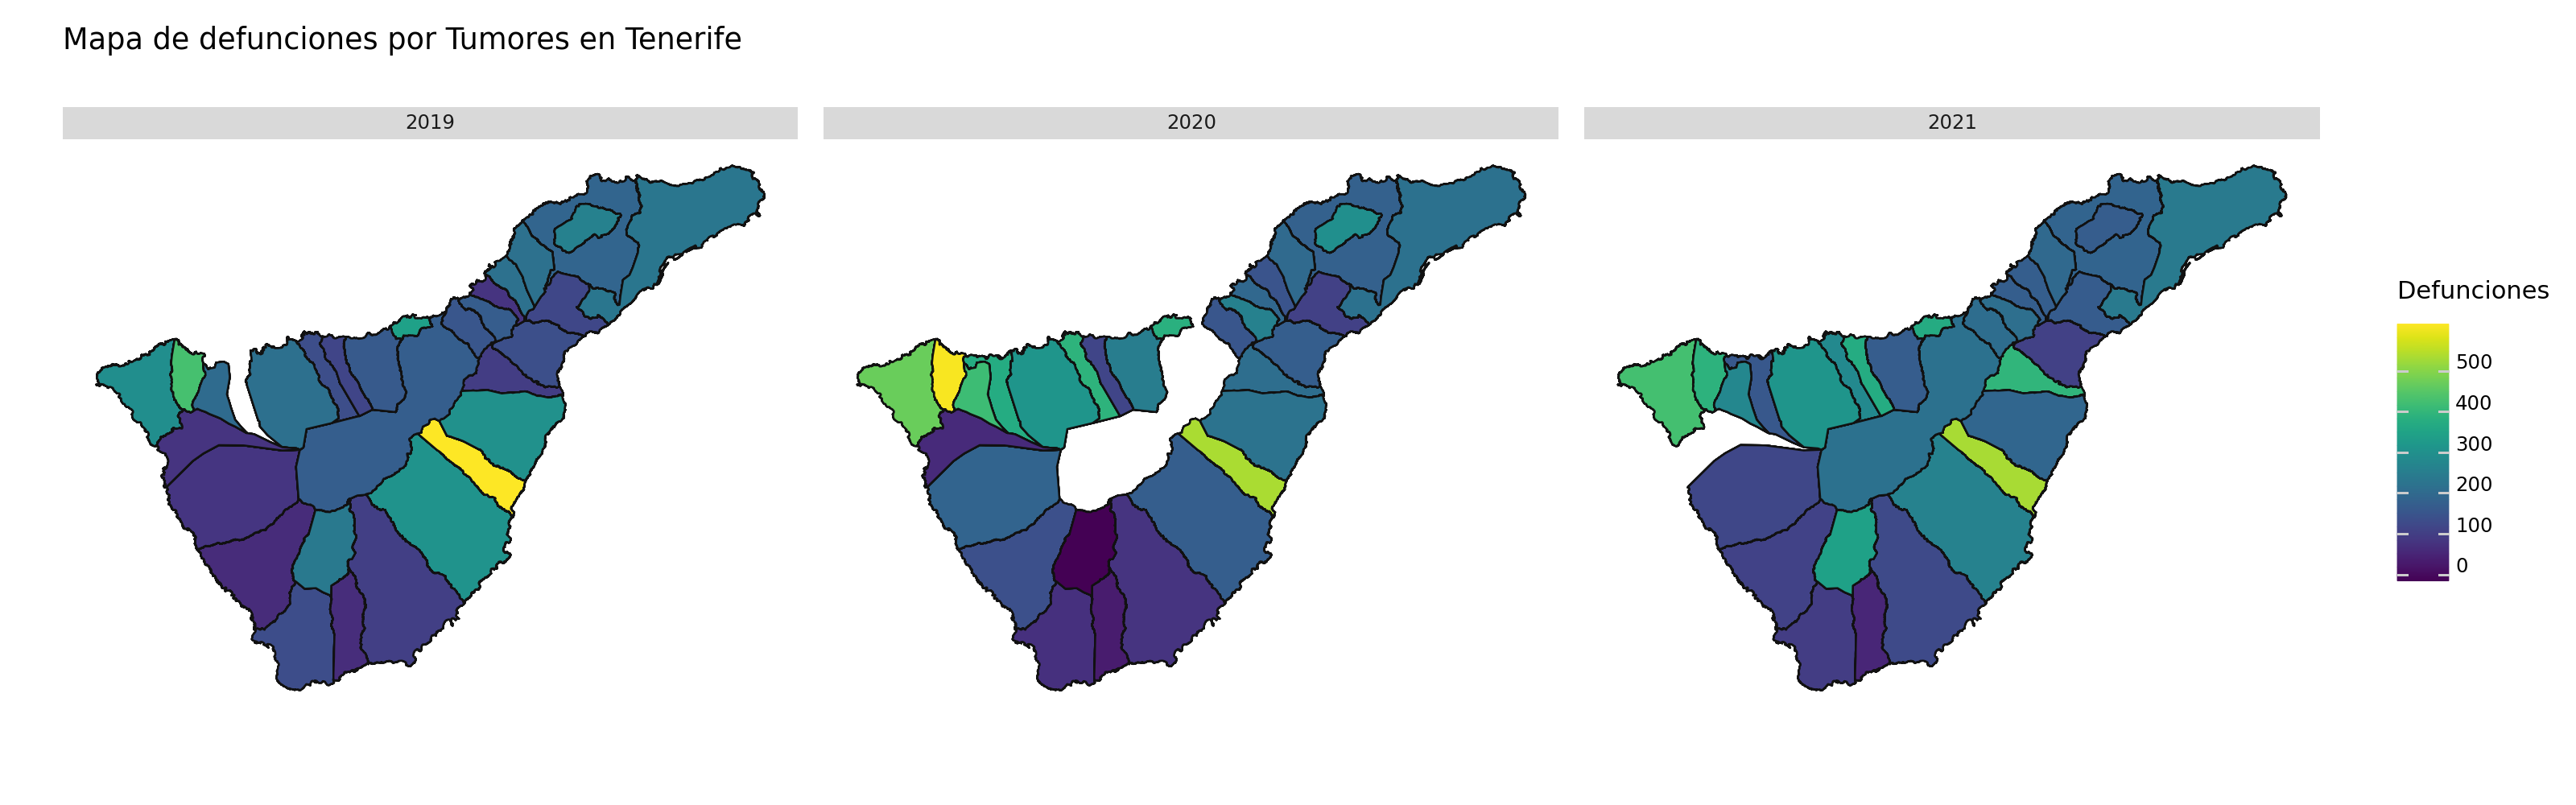

<Figure Size: (1600 x 500)>

In [13]:
df_defun_tnf_circul = df_defun.query('ISLA_CODE == "ES709" and Tipo == "IX. ENFERMEDADES DEL SISTEMA CIRCULATORIO"')[['Municipio_codigo', 'Año', 'Defunciones']]

df_pob_tnf_circul = pd.merge(
    left = df_pob,
    right = df_defun_tnf_circul,
    how = 'inner',
    left_on = 'municipio',
    right_on = 'Municipio_codigo'
).filter(['Año', 'Defunciones', 'geometry'])

(ggplot()
    + geom_map(df_pob_tnf_circul, aes(fill = 'Defunciones'))
    + facet_wrap("~Año")
    + labs(title = 'Mapa de defunciones por Tumores en Tenerife')
    + theme(
        figure_size = (16, 5),
        panel_background = element_rect(fill = 'white'),
        axis_text_x = element_blank(),
        axis_text_y = element_blank(),
        axis_ticks_major_x = element_blank(),
        axis_ticks_major_y = element_blank()
    )
)

### Distribución de puestos de trabajo en las zonas con mayores muertes por enfermedad circulatoria

#### Puerto de la Cruz

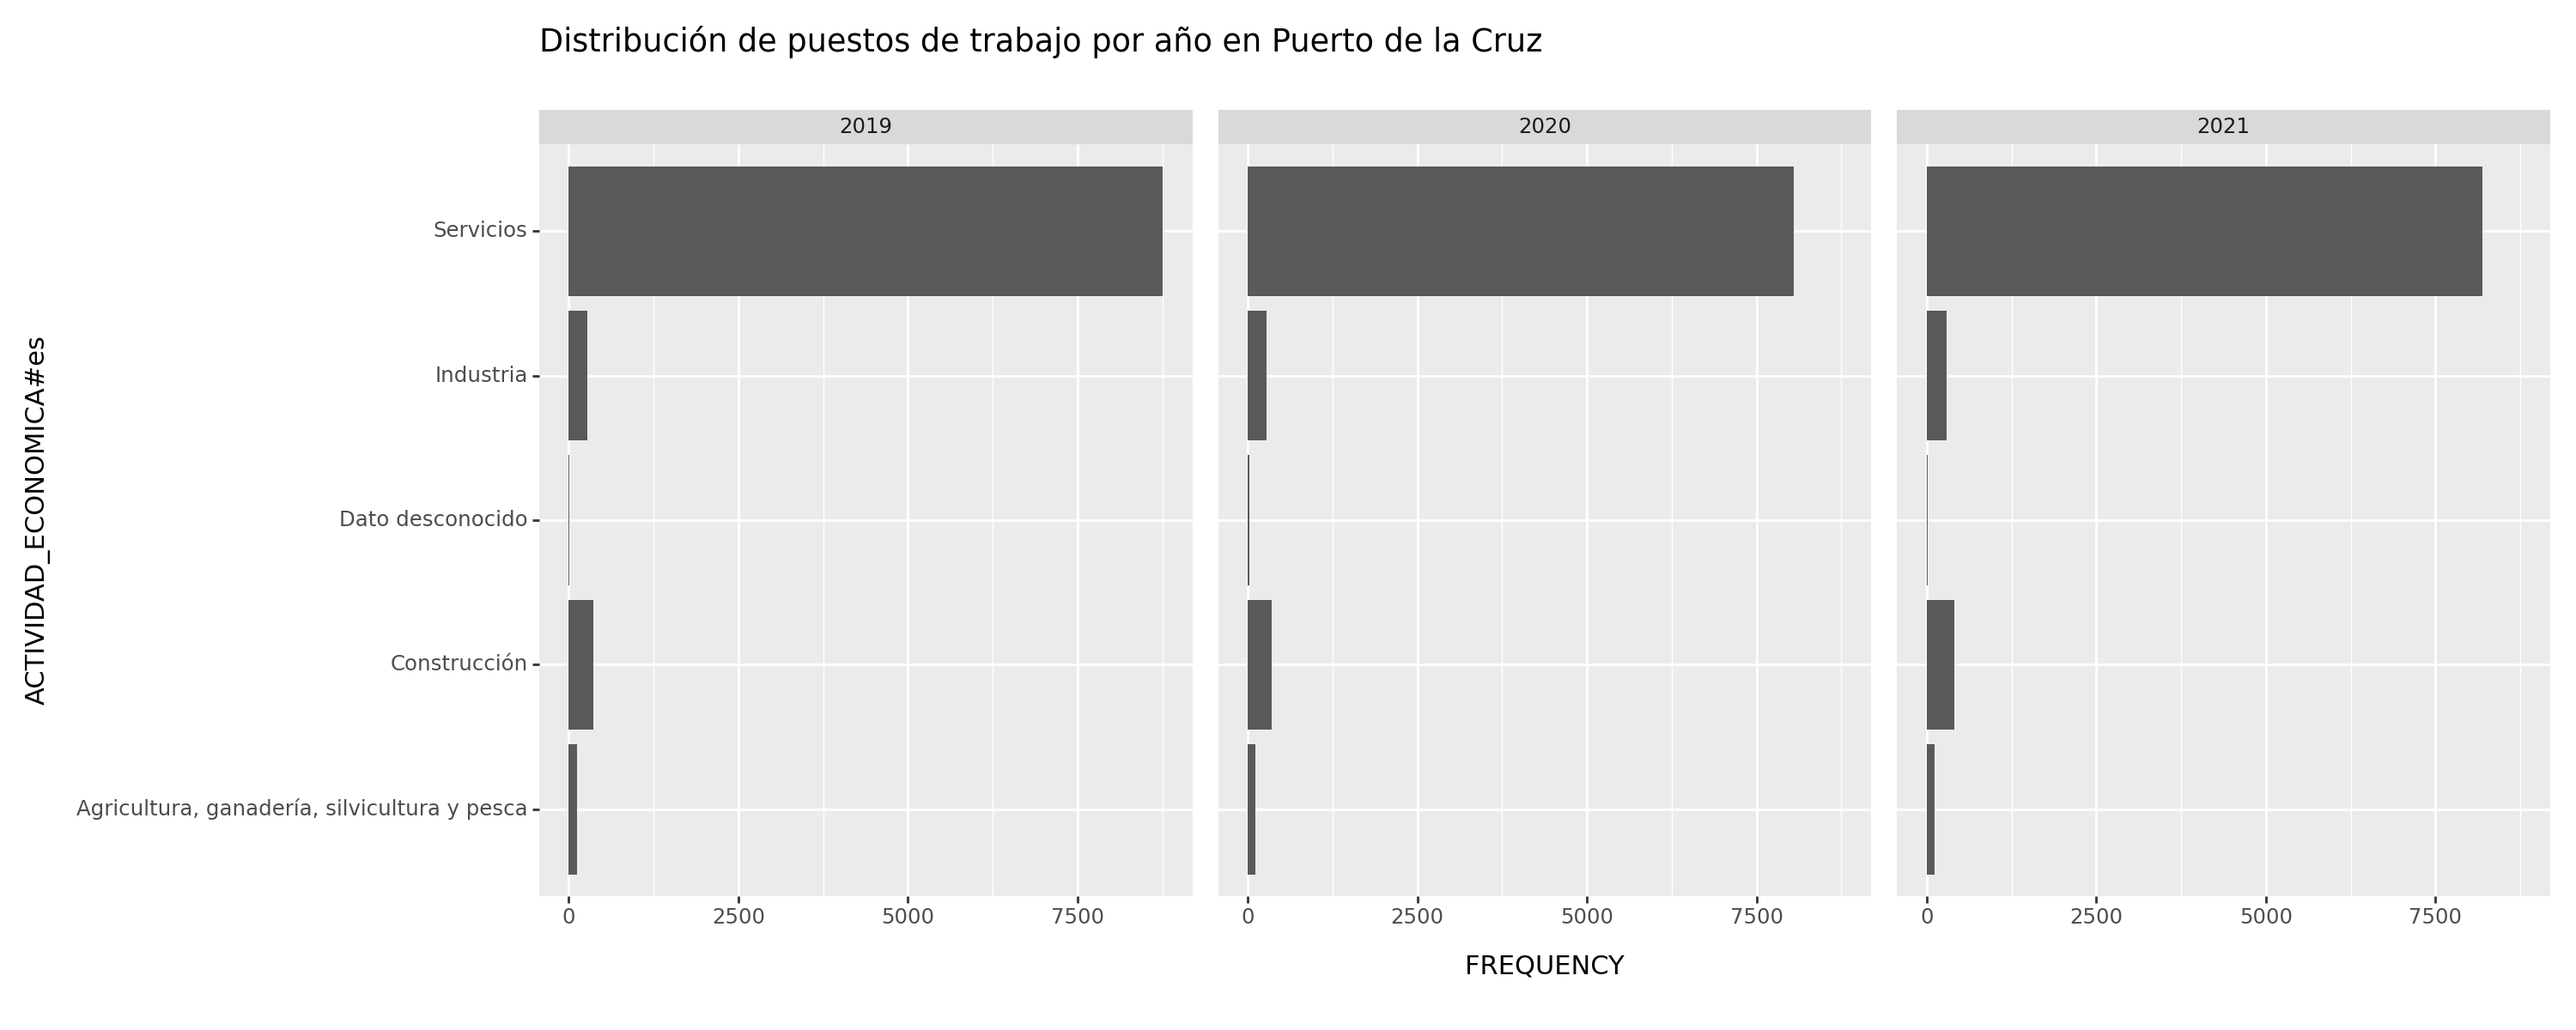

<Figure Size: (1500 x 600)>

In [14]:
df_p_ocup_pcruz = df_p_ocup[df_p_ocup['TERRITORIO#es'] == 'Puerto de la Cruz'].copy()

df_p_ocup_pcruz_2019 = (df_p_ocup_pcruz[df_p_ocup_pcruz['TIME_PERIOD_CODE'].str.startswith('2019')]
                        .groupby(['ACTIVIDAD_ECONOMICA#es', 'SEXO#es'])
                        .agg({'FREQUENCY' : 'mean'})
                        .reset_index())
df_p_ocup_pcruz_2019['Año'] = 2019

df_p_ocup_pcruz_2020 = (df_p_ocup_pcruz[df_p_ocup_pcruz['TIME_PERIOD_CODE'].str.startswith('2020')]
                        .groupby(['ACTIVIDAD_ECONOMICA#es', 'SEXO#es'])
                        .agg({'FREQUENCY' : 'mean'})
                        .reset_index())
df_p_ocup_pcruz_2020['Año'] = 2020

df_p_ocup_pcruz_2021 = (df_p_ocup_pcruz[df_p_ocup_pcruz['TIME_PERIOD_CODE'].str.startswith('2021')]
                        .groupby(['ACTIVIDAD_ECONOMICA#es', 'SEXO#es'])
                        .agg({'FREQUENCY' : 'mean'})
                        .reset_index())
df_p_ocup_pcruz_2021['Año'] = 2021

df_p_ocup_pcruz = pd.concat([
    df_p_ocup_pcruz_2019,
    df_p_ocup_pcruz_2020,
    df_p_ocup_pcruz_2021,
])

(ggplot(df_p_ocup_pcruz, aes(x = 'ACTIVIDAD_ECONOMICA#es', y = 'FREQUENCY'))
    + geom_col()
    + coord_flip()
    + facet_wrap('~Año')
    + theme(figure_size=(15, 6))
    + ggtitle('Distribución de puestos de trabajo por año en Puerto de la Cruz')
)

#### Fasnia

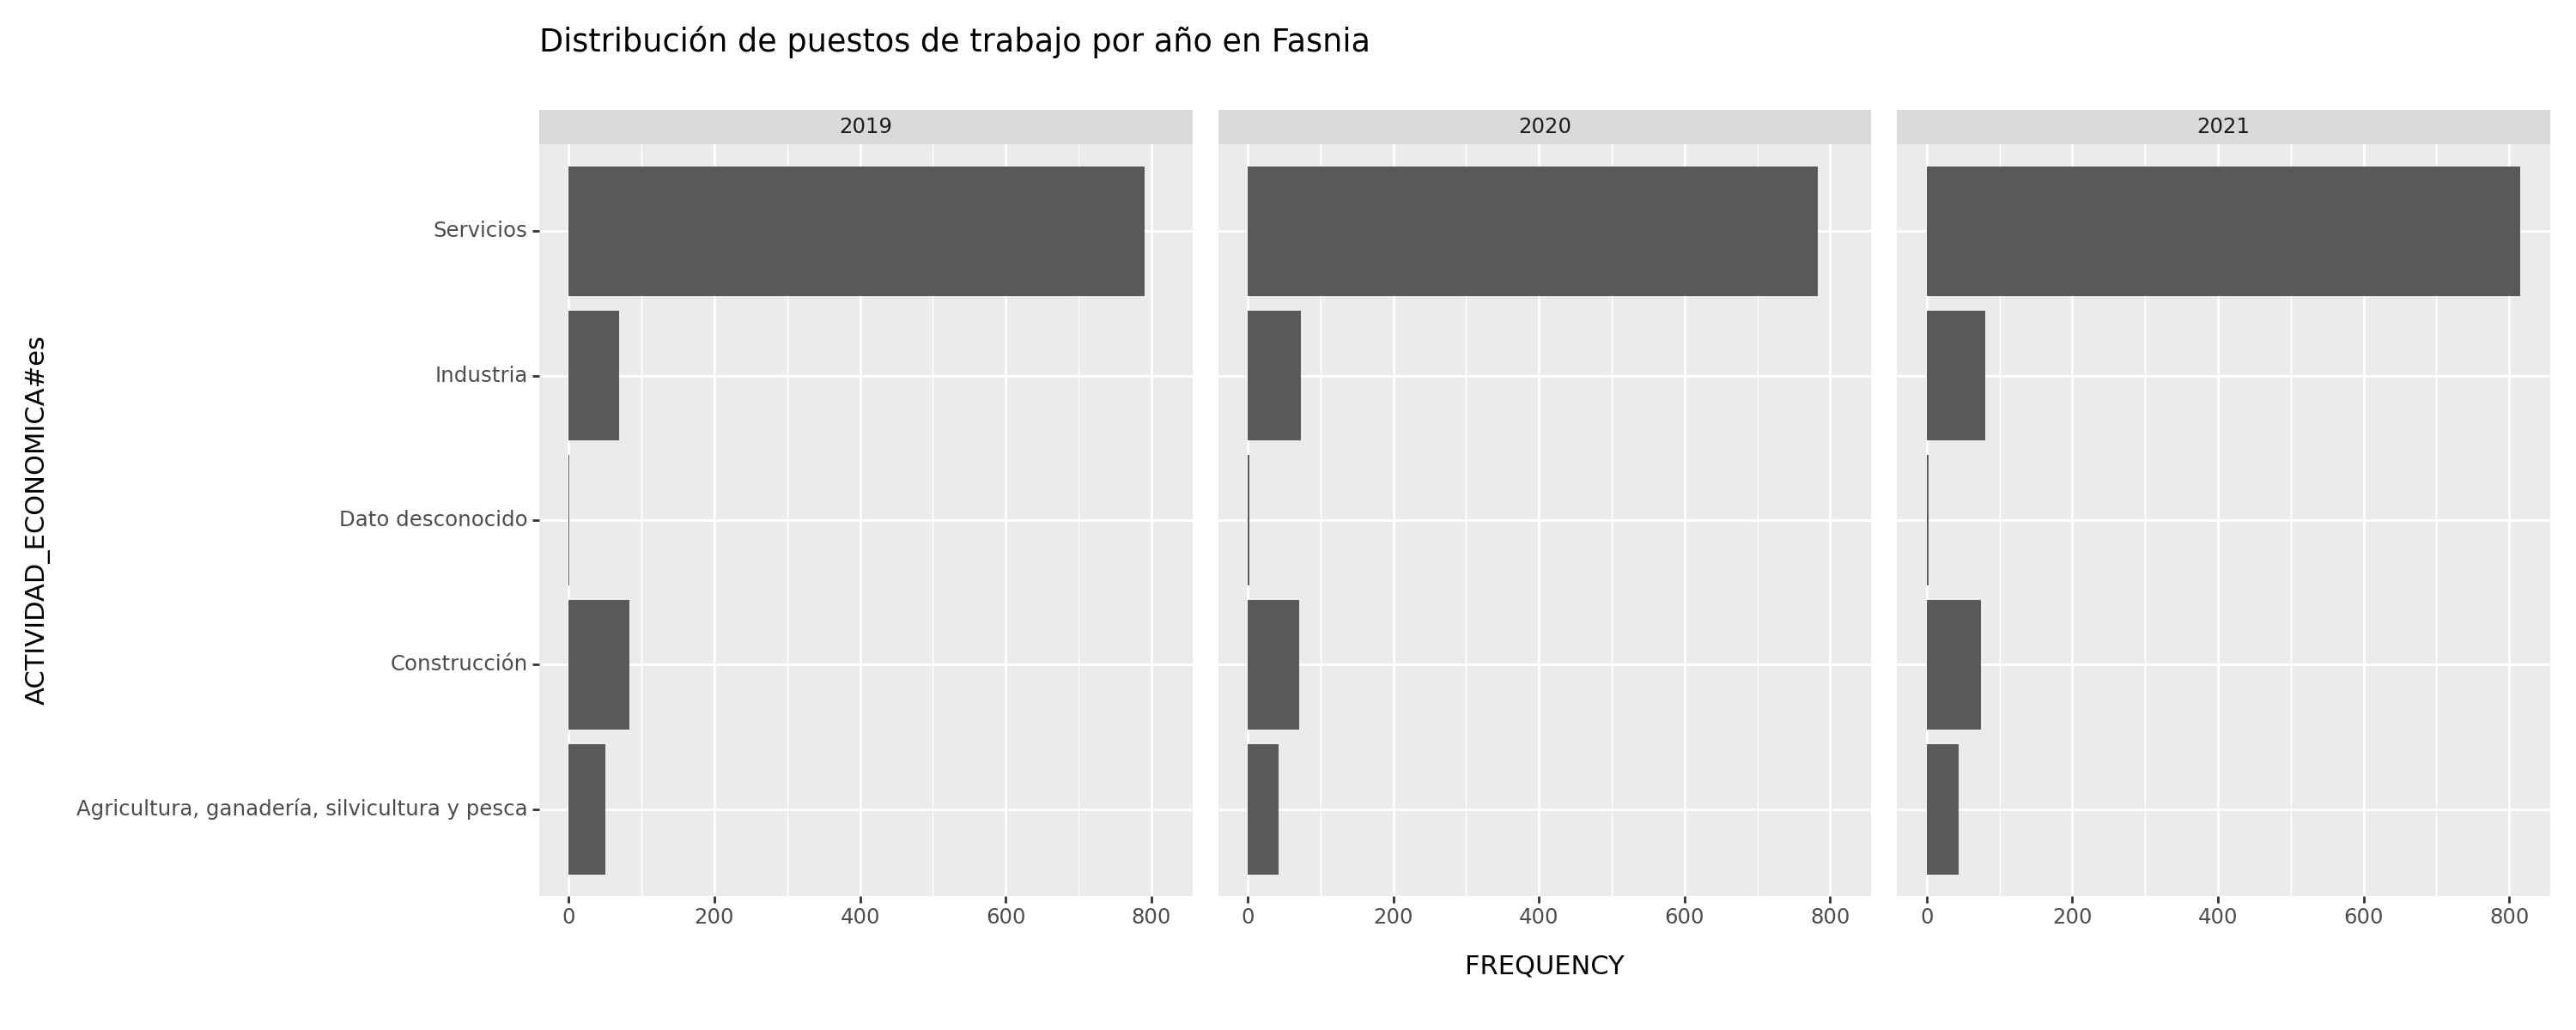

<Figure Size: (1500 x 600)>

In [16]:
df_p_ocup_fasnia = df_p_ocup[df_p_ocup['TERRITORIO#es'] == 'Fasnia'].copy()

df_p_ocup_fasnia_2019 = (df_p_ocup_fasnia[df_p_ocup_fasnia['TIME_PERIOD_CODE'].str.startswith('2019')]
                        .groupby(['ACTIVIDAD_ECONOMICA#es', 'SEXO#es'])
                        .agg({'FREQUENCY' : 'mean'})
                        .reset_index())
df_p_ocup_fasnia_2019['Año'] = 2019

df_p_ocup_fasnia_2020 = (df_p_ocup_fasnia[df_p_ocup_fasnia['TIME_PERIOD_CODE'].str.startswith('2020')]
                        .groupby(['ACTIVIDAD_ECONOMICA#es', 'SEXO#es'])
                        .agg({'FREQUENCY' : 'mean'})
                        .reset_index())
df_p_ocup_fasnia_2020['Año'] = 2020

df_p_ocup_fasnia_2021 = (df_p_ocup_fasnia[df_p_ocup_fasnia['TIME_PERIOD_CODE'].str.startswith('2021')]
                        .groupby(['ACTIVIDAD_ECONOMICA#es', 'SEXO#es'])
                        .agg({'FREQUENCY' : 'mean'})
                        .reset_index())
df_p_ocup_fasnia_2021['Año'] = 2021

df_p_ocup_fasnia = pd.concat([
    df_p_ocup_fasnia_2019,
    df_p_ocup_fasnia_2020,
    df_p_ocup_fasnia_2021,
])

(ggplot(df_p_ocup_fasnia, aes(x = 'ACTIVIDAD_ECONOMICA#es', y = 'FREQUENCY'))
    + geom_col()
    + coord_flip()
    + facet_wrap('~Año')
    + theme(figure_size=(15, 6))
    + ggtitle('Distribución de puestos de trabajo por año en Fasnia')
)

### Distribución de edad para zonas afectadas

#### Puerto de La Cruz

In [ ]:
# TODO

#### Fasnia

In [ ]:
# TODO